In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2
import random
from sklearn.utils import class_weight
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lite_data = pd.read_csv('/content/Litecoin Historical Data - Investing.com.csv') 
monero_data = pd.read_csv('/content/Monero Historical Data - Investing.com.csv')
lite_data = lite_data.iloc[::-1].reset_index(drop=True)
monero_data = monero_data.iloc[::-1].reset_index(drop=True)
del lite_data['Date']
del lite_data['Change %']

del monero_data['Date']
del monero_data['Change %']

In [3]:
lite_data

,Price,Open,High,Low,Vol.
0,3.840,3.950,3.960,3.610,21.86K
1,3.810,3.840,3.880,3.750,21.87K
2,3.810,3.810,3.900,3.770,14.35K
3,3.780,3.810,3.850,3.620,4.91K
4,3.720,3.780,3.780,3.620,8.19K
...,...,...,...,...,...
1274,70.782,77.173,79.041,68.264,12.10M
1275,69.455,70.782,72.339,66.495,12.45M
1276,73.291,69.455,75.161,68.633,12.13M
1277,74.818,73.288,76.642,72.422,11.56M


In [4]:
monero_data

,Price,Open,High,Low,Vol.
0,0.303,0.311,0.350,0.303,1.33K
1,0.290,0.303,0.303,0.290,0.48K
2,0.290,0.290,0.290,0.290,-
3,0.303,0.290,0.303,0.287,0.35K
4,0.331,0.303,0.360,0.302,1.47K
...,...,...,...,...,...
1846,77.843,86.158,86.914,76.718,304.86K
1847,76.355,77.843,78.903,75.102,384.42K
1848,80.313,76.355,82.285,75.886,290.15K
1849,79.027,80.308,82.896,78.169,277.07K


In [5]:
lite_data.info();
lite_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1279 non-null   float64
 1   Open    1279 non-null   float64
 2   High    1279 non-null   float64
 3   Low     1279 non-null   float64
 4   Vol.    1279 non-null   object 
dtypes: float64(4), object(1)
memory usage: 50.1+ KB


,Price,Open,High,Low
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,67.261640,67.202941,70.328886,63.799911
std,58.389978,58.418430,62.140588,54.120309
min,3.500000,3.510000,3.580000,3.260000
25%,30.966000,30.908000,32.306000,29.569500
50%,55.610000,55.560000,57.401000,53.836000
75%,84.792500,84.800500,88.595000,81.423500
max,359.400000,359.400000,420.000000,324.670000


In [6]:
monero_data.info();
monero_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1851 non-null   float64
 1   Open    1851 non-null   float64
 2   High    1851 non-null   float64
 3   Low     1851 non-null   float64
 4   Vol.    1851 non-null   object 
dtypes: float64(4), object(1)
memory usage: 72.4+ KB


,Price,Open,High,Low
count,1851.000000,1851.000000,1851.000000,1851.000000
mean,63.577471,63.538076,66.493621,60.244130
std,81.123977,81.145443,85.661109,75.581774
min,0.099000,0.099000,0.099000,0.010000
25%,1.100000,1.095000,1.205000,1.015000
50%,45.400000,45.398000,46.720000,43.600000
75%,89.955000,89.955000,93.975000,87.221000
max,475.000000,475.000000,478.000000,392.826000


In [3]:
def convert2int(x):
  if 'K' in x:
    return int(float(x.replace('K',''))*1000)
  elif 'M' in x:
    return int(float(x.replace('M',''))*1e06)

In [4]:
lite_data['Vol.'] = lite_data['Vol.'].apply(convert2int)
monero_data['Vol.'] = monero_data['Vol.'].apply(convert2int)

In [5]:
sum(lite_data['Vol.'].isna()) , sum(monero_data['Vol.'].isna())  

(0, 138)

In [6]:
monero_data['Vol.'].fillna(method = 'ffill', inplace=True)

## Data Normalization

In [7]:
LitePrice_max = lite_data['Price'].max()
LitePrice_min = lite_data['Price'].min()
MoneroPrice_max = monero_data['Price'].max()
MoneroPrice_min = monero_data['Price'].min()
lite_data = lite_data.apply(lambda iterator:((iterator-iterator.min())/(iterator.max() - iterator.min()).round(3)))
monero_data = monero_data.apply(lambda iterator:((iterator-iterator.min())/(iterator.max() - iterator.min()).round(3)))

In [8]:
lite_data

,Price,Open,High,Low,Vol.
0,0.000955,0.001236,0.000913,0.001089,0.000675
1,0.000871,0.000927,0.000720,0.001525,0.000675
2,0.000871,0.000843,0.000768,0.001587,0.000442
3,0.000787,0.000843,0.000648,0.001120,0.000150
4,0.000618,0.000759,0.000480,0.001120,0.000252
...,...,...,...,...,...
1274,0.189047,0.206982,0.181214,0.202246,0.374612
1275,0.185319,0.189025,0.165119,0.196742,0.385448
1276,0.196097,0.185296,0.171896,0.203394,0.375541
1277,0.200388,0.196066,0.175453,0.215183,0.357894


In [10]:
monero_data

,Price,Open,High,Low,Vol.
0,0.000430,0.000446,0.000525,0.000746,0.001039
1,0.000402,0.000430,0.000427,0.000713,0.000370
2,0.000402,0.000402,0.000400,0.000713,0.000370
3,0.000430,0.000402,0.000427,0.000705,0.000268
4,0.000489,0.000430,0.000546,0.000743,0.001150
...,...,...,...,...,...
1846,0.163706,0.181215,0.181659,0.195277,0.240041
1847,0.160572,0.163706,0.164896,0.191163,0.302687
1848,0.168907,0.160572,0.171973,0.193159,0.228458
1849,0.166199,0.168896,0.173251,0.198971,0.218159


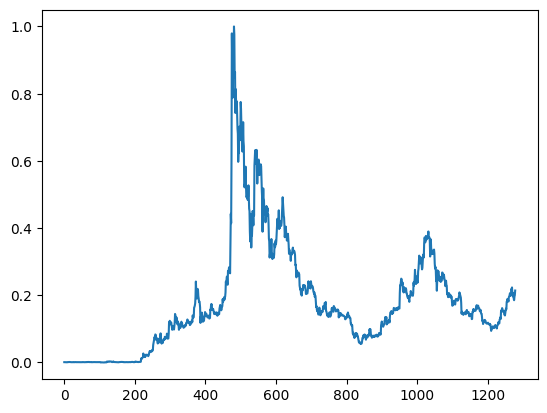

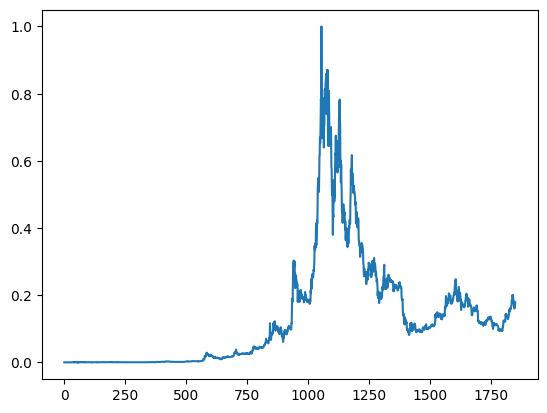

In [11]:
plt.plot(lite_data['Price'])
plt.show()
plt.plot(monero_data['Price']) 

## Data preparing

In [8]:
n = 30
w = 0
lite_data_x = list()
lite_data_y = list()

monero_data_x = list()
monero_data_y = list()

while True:
  x = [lite_data.iloc[i+w] for i in range(n)]  
  lite_data_x.append(x)
  y = lite_data.iloc[n+w]['Price']
  lite_data_y.append(y)                   
  w+=1
  if (w==len(lite_data)-n):
    break

n = 30
w = 0
while True:
  i = [monero_data.iloc[i+w] for i in range(n)]  
  monero_data_x.append(i)
  j = monero_data.iloc[n+w]['Price']
  monero_data_y.append(j)                   
  w+=1
  if (w==len(monero_data)-n):
    break    

In [9]:
len(lite_data_x) , len(lite_data_y) , len(monero_data_x) , len(monero_data_y)

(1249, 1249, 1821, 1821)

In [19]:
lite_data_x = np.asarray(lite_data_x)
lite_data_y = np.asarray(lite_data_y)

monero_data_x = np.asarray(monero_data_x)
monero_data_y = np.asarray(monero_data_y)

In [11]:
monero_data_x[1230][-1] , monero_data_y[1229]

(array([0.25386344, 0.26546164, 0.26524322, 0.29918079, 0.04296097]),
 0.2538634368005121)

In [12]:
lite_data_x.shape , lite_data_y.shape , monero_data_x.shape , monero_data_y.shape

((1249, 30, 5), (1249,), (1821, 30, 5), (1821,))

# Training Model

### LSTM Model & Proposed Model

In [25]:
from keras.layers import Input, LSTM, GRU, concatenate, Dense, Dropout
from keras.models import Model

input_shape = (30,5) 

inputs = Input(shape=input_shape)

x = LSTM(units=30, return_sequences=True)(inputs)
x = Dropout(0.6)(x)
x = LSTM(units=50)(x)
lstm_output = Dense(1, activation = 'relu')(x)

x = GRU(units=30)(inputs)
x = Dropout(0.6)(x)
gru_output = Dense(1, activation = 'relu')(x)

x = concatenate([lstm_output, gru_output])
x = Dense(units=1)(x)

model_LSTM = Model(inputs = inputs ,outputs = lstm_output)
model_Hybrid = Model(inputs = inputs, outputs=x)

model_LSTM.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model_Hybrid.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [26]:
X_train_l = lite_data_x[0:1000] 
X_val_l = lite_data_x[1000:-30]
X_test_l = lite_data_x[-30:]

y_train_l = lite_data_y[0:1000] 
y_val_l = lite_data_y[1000:-30]
y_test_l = lite_data_y[-30:]


X_train_m = monero_data_x[0:1400] 
X_val_m = monero_data_x[1400:-30]
X_test_m = monero_data_x[-30:]

y_train_m = monero_data_y[0:1400] 
y_val_m = monero_data_y[1400:-30]
y_test_m = monero_data_y[-30:]

In [27]:
nb_epoch = 100
batch_size = 32
history_hybrid_l = model_Hybrid.fit(X_train_l, y_train_l, validation_data=(X_val_l, y_val_l), batch_size=batch_size, epochs=nb_epoch) 

Epoch 1/100
32/32 [==============================] - 10s 114ms/step - loss: 0.0356 - mae: 0.1258 - val_loss: 0.0016 - val_mae: 0.0343
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 0.0068 - mae: 0.0465 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0049 - mae: 0.0380 - val_loss: 0.0039 - val_mae: 0.0553
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.0040 - mae: 0.0332 - val_loss: 0.0030 - val_mae: 0.0487
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0031 - mae: 0.0304 - val_loss: 7.7042e-04 - val_mae: 0.0204
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0027 - mae: 0.0286 - val_loss: 5.8883e-04 - val_mae: 0.0165
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0025 - mae: 0.0282 - val_loss: 6.8085e-04 - val_mae: 0.0183
Epoch 8/100
32/32 [==============================] - 1s 36ms/s

In [17]:
nb_epoch = 100
batch_size = 32
history_lstm_l = model_LSTM.fit(X_train_l, y_train_l, validation_data=(X_val_l, y_val_l), batch_size=batch_size, epochs=nb_epoch)

Epoch 1/100
32/32 [==============================] - 7s 65ms/step - loss: 0.0172 - mae: 0.0752 - val_loss: 3.3939e-04 - val_mae: 0.0134
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0039 - mae: 0.0326 - val_loss: 0.0013 - val_mae: 0.0309
Epoch 3/100
32/32 [==============================] - 2s 51ms/step - loss: 0.0032 - mae: 0.0281 - val_loss: 7.6771e-04 - val_mae: 0.0225
Epoch 4/100
32/32 [==============================] - 2s 58ms/step - loss: 0.0028 - mae: 0.0259 - val_loss: 5.8316e-04 - val_mae: 0.0191
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0028 - mae: 0.0289 - val_loss: 9.4143e-04 - val_mae: 0.0254
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0024 - mae: 0.0248 - val_loss: 0.0012 - val_mae: 0.0288
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0023 - mae: 0.0239 - val_loss: 2.7729e-04 - val_mae: 0.0118
Epoch 8/100
32/32 [==============================] - 1s 

In [15]:
nb_epoch = 100
batch_size = 32
history_hybrid_m = model_Hybrid.fit(X_train_m, y_train_m, validation_data=(X_val_m, y_val_m), batch_size=batch_size, epochs=nb_epoch)

Epoch 1/100
44/44 [==============================] - 12s 35ms/step - loss: 0.0076 - mae: 0.0469 - val_loss: 7.2067e-04 - val_mae: 0.0226
Epoch 2/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0028 - mae: 0.0257 - val_loss: 3.5458e-04 - val_mae: 0.0155
Epoch 3/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0023 - mae: 0.0228 - val_loss: 4.5039e-04 - val_mae: 0.0179
Epoch 4/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0020 - mae: 0.0217 - val_loss: 6.4146e-04 - val_mae: 0.0193
Epoch 5/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0017 - mae: 0.0201 - val_loss: 6.1498e-04 - val_mae: 0.0184
Epoch 6/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0015 - mae: 0.0190 - val_loss: 5.1888e-04 - val_mae: 0.0171
Epoch 7/100
44/44 [==============================] - 0s 11ms/step - loss: 0.0013 - mae: 0.0181 - val_loss: 5.3292e-04 - val_mae: 0.0179
Epoch 8/100
44/44 [============================

In [27]:
nb_epoch = 100
batch_size = 32
history_lstm_m = model_LSTM.fit(X_train_m, y_train_m, validation_data=(X_val_m, y_val_m), batch_size=batch_size, epochs=nb_epoch)

Epoch 1/100
44/44 [==============================] - 5s 24ms/step - loss: 0.0069 - mae: 0.0442 - val_loss: 4.0994e-04 - val_mae: 0.0167
Epoch 2/100
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mae: 0.0245 - val_loss: 2.9171e-04 - val_mae: 0.0134
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0225 - val_loss: 0.0010 - val_mae: 0.0252
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0015 - mae: 0.0185 - val_loss: 0.0012 - val_mae: 0.0273
Epoch 5/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0208 - val_loss: 9.4416e-04 - val_mae: 0.0249
Epoch 6/100
44/44 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0207 - val_loss: 5.0181e-04 - val_mae: 0.0168
Epoch 7/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0198 - val_loss: 4.2709e-04 - val_mae: 0.0152
Epoch 8/100
44/44 [==============================] - 0s 8ms/st

## Predictions

In [18]:
y_pred_l_hybrid = [np.float32((LitePrice_max - LitePrice_min)) * model_Hybrid(np.expand_dims(X_test_l[i], axis=0))[0][0] + np.float32(LitePrice_min) for i in range(len(y_test_l))]

In [18]:
y_pred_l_lstm = [np.float32((LitePrice_max - LitePrice_min)) * model_LSTM(np.expand_dims(X_test_l[i], axis=0))[0][0] + np.float32(LitePrice_min) for i in range(len(y_test_l))]

In [22]:
y_pred_m_hybrid = [np.float32((MoneroPrice_max - MoneroPrice_min)) * model_Hybrid(np.expand_dims(X_test_m[i], axis=0))[0][0] + np.float32(MoneroPrice_min) for i in range(len(y_test_m))]

In [28]:
y_pred_m_lstm = [np.float32((MoneroPrice_max - MoneroPrice_min)) * model_LSTM(np.expand_dims(X_test_m[i], axis=0))[0][0] + np.float32(MoneroPrice_min) for i in range(len(y_test_m))]

In [29]:
y_test_l = y_test_l * np.float32((LitePrice_max - LitePrice_min))  + np.float32(LitePrice_min)
y_test_m = y_test_m * np.float32((MoneroPrice_max - MoneroPrice_min))  + np.float32(MoneroPrice_min)

## Lite - Hybrid - PLots

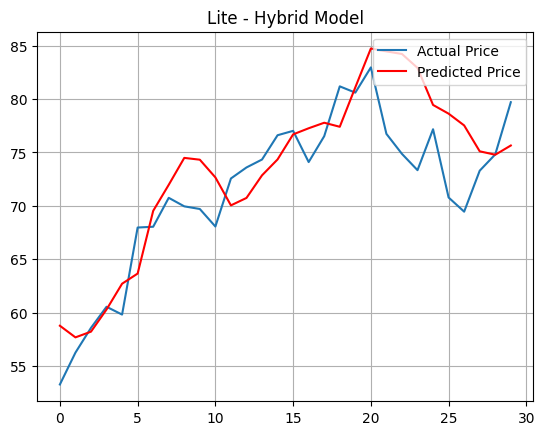

In [20]:
plt.plot(y_test_l, label='Actual Price')
plt.plot(y_pred_l_hybrid ,color='red', label = 'Predicted Price')
plt.legend(loc="upper right")
plt.title('Lite - Hybrid Model')
plt.grid()
plt.show()

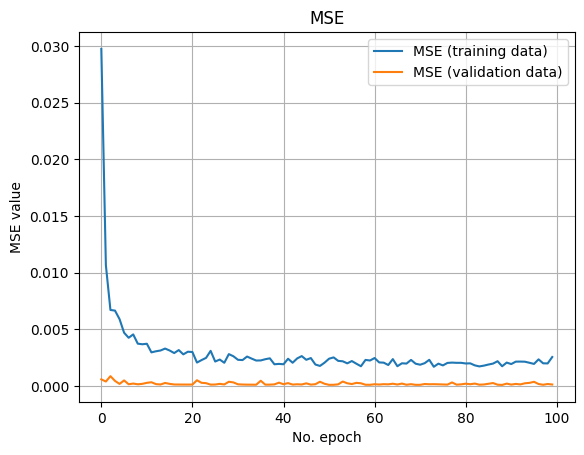

In [33]:
plt.plot(history_hybrid_l.history['loss'], label='MSE (training data)')
plt.plot(history_hybrid_l.history['val_loss'], label='MSE (validation data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

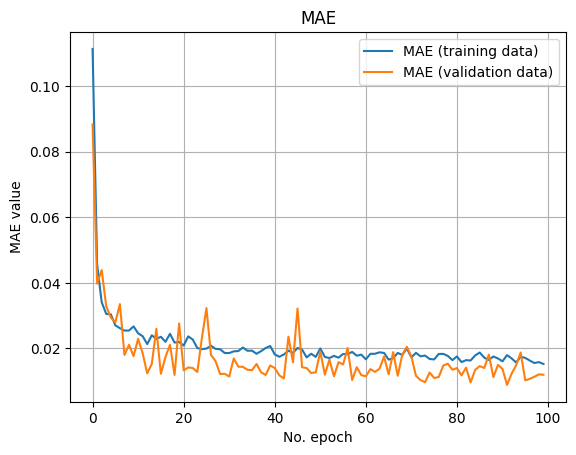

In [21]:
plt.plot(history_hybrid_l.history['mae'], label='MAE (training data)')
plt.plot(history_hybrid_l.history['val_mae'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

## Lite - LSTM - PLots

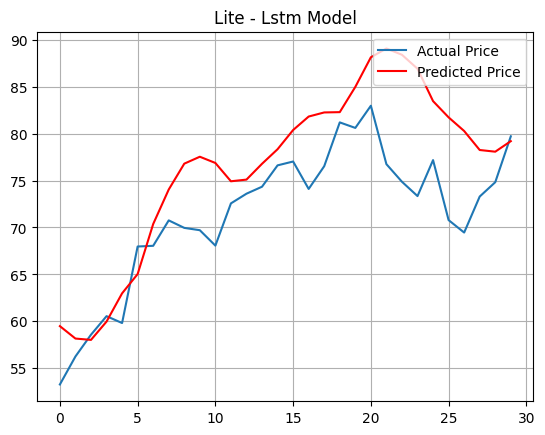

In [20]:
plt.plot(y_test_l, label='Actual Price')
plt.plot(y_pred_l_lstm ,color='red', label = 'Predicted Price')
plt.legend(loc="upper right")
plt.title('Lite - Lstm Model')
plt.grid()
plt.show()

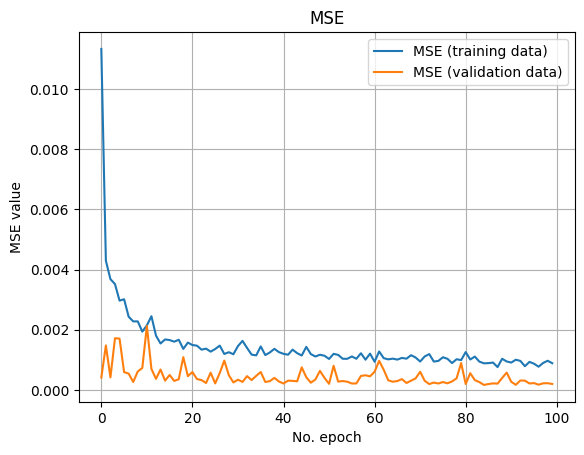

In [19]:
plt.plot(history_lstm_l.history['loss'], label='MSE (training data)')
plt.plot(history_lstm_l.history['val_loss'], label='MSE (validation data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

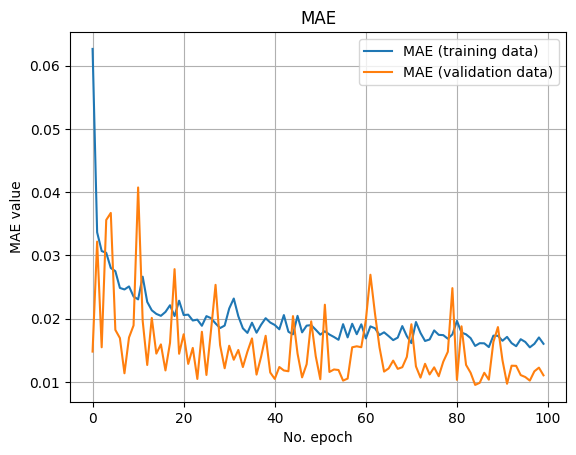

In [20]:
plt.plot(history_lstm_l.history['mae'], label='MAE (training data)')
plt.plot(history_lstm_l.history['val_mae'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

## Monero - Hybrid - Plots

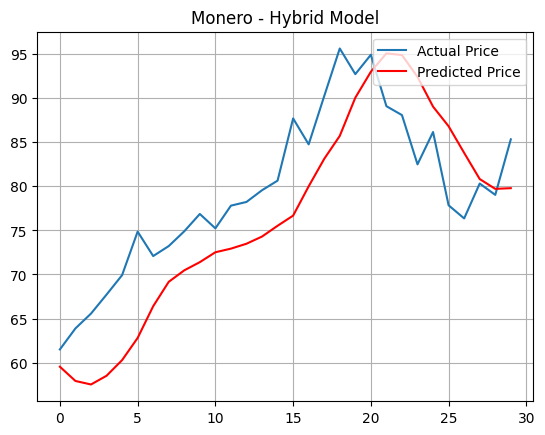

In [24]:
plt.plot(y_test_m, label='Actual Price')
plt.plot(y_pred_m_hybrid ,color='red', label = 'Predicted Price')
plt.legend(loc="upper right")
plt.title('Monero - Hybrid Model')
plt.grid()
plt.show()

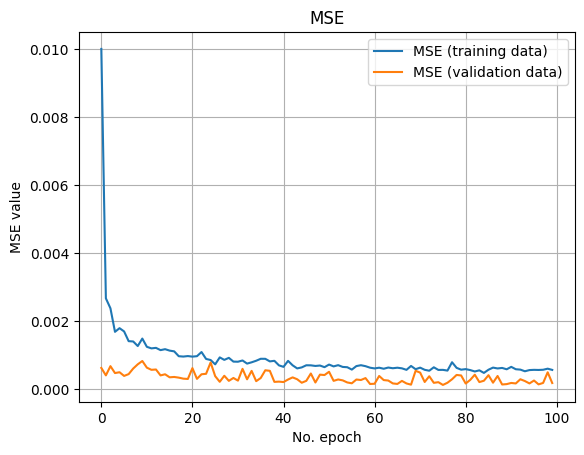

In [18]:
plt.plot(history_hybrid_m.history['loss'], label='MSE (training data)')
plt.plot(history_hybrid_m.history['val_loss'], label='MSE (validation data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

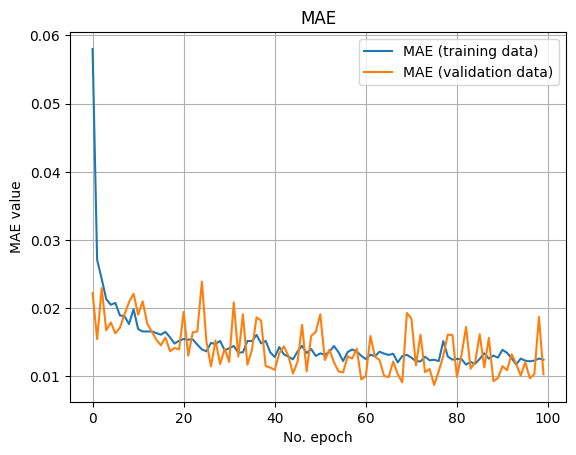

In [19]:
plt.plot(history_hybrid_m.history['mae'], label='MAE (training data)')
plt.plot(history_hybrid_m.history['val_mae'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

## Monero - LSTM - PLots

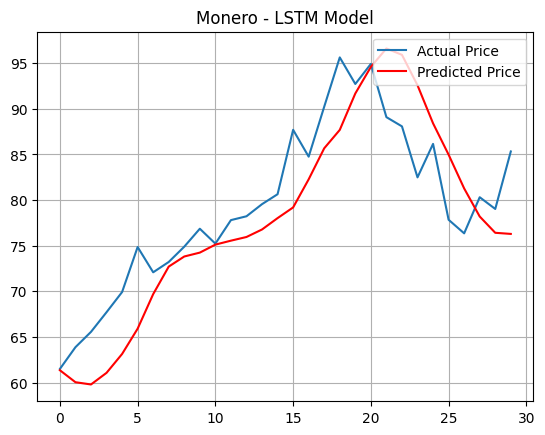

In [31]:
plt.plot(y_test_m, label='Actual Price')
plt.plot(y_pred_m_lstm ,color='red', label = 'Predicted Price')
plt.legend(loc="upper right")
plt.title('Monero - LSTM Model')
plt.grid()
plt.show()

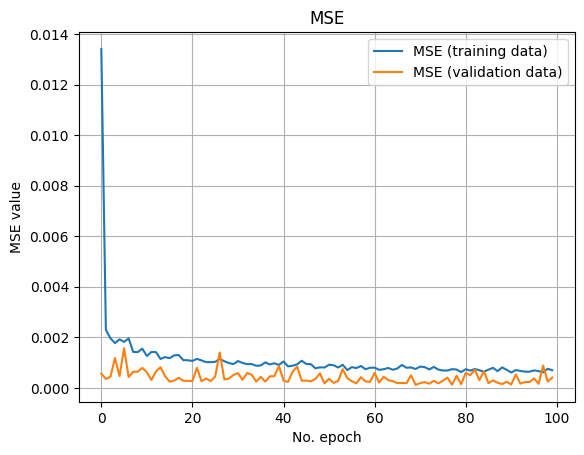

In [21]:
plt.plot(history_lstm_m.history['loss'], label='MSE (training data)')
plt.plot(history_lstm_m.history['val_loss'], label='MSE (validation data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

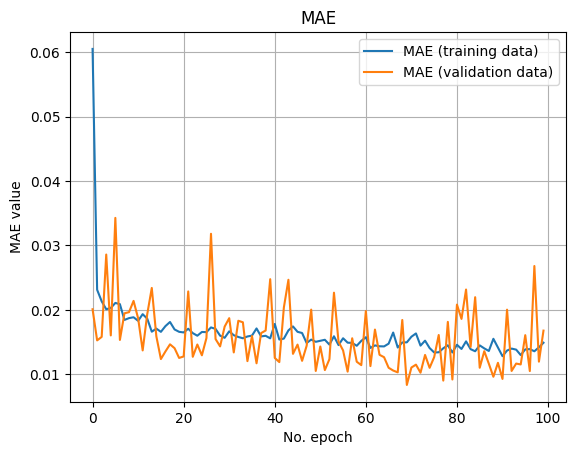

In [22]:
plt.plot(history_lstm_m.history['mae'], label='MAE (training data)')
plt.plot(history_lstm_m.history['val_mae'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

## Model Hybrid - Lite Evaluation

In [21]:
next_day_input = lite_data_x[-1] # Get most recent 30 days of data
next_day_prediction = np.float32((LitePrice_max - LitePrice_min)) * model_Hybrid.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(LitePrice_min)

# Predict next 3 days
next_3_days_prediction = []
for i in range(3):
    next_day_input = lite_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((LitePrice_max - LitePrice_min)) * model_Hybrid.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(LitePrice_min)
    next_3_days_prediction.append(next_day_prediction)

next_3_days_prediction = np.asarray(next_3_days_prediction)
# Predict next 7 days 
next_7_days_prediction = []
for i in range(7):
    next_day_input = lite_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((LitePrice_max - LitePrice_min)) * model_Hybrid.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(LitePrice_min)
    next_7_days_prediction.append(next_day_prediction)

next_7_days_prediction = np.asarray(next_7_days_prediction) + np.float32(LitePrice_min)

lite_data_y_1 = np.float32((LitePrice_max - LitePrice_min)) *  lite_data_y[-1] + np.float32(LitePrice_min)
lite_data_y_3 = np.float32((LitePrice_max - LitePrice_min)) *  lite_data_y[-4:-1] + np.float32(LitePrice_min)
lite_data_y_7 = np.float32((LitePrice_max - LitePrice_min)) *  lite_data_y[-8:-1] + np.float32(LitePrice_min)


mse_1 = (np.mean(np.square(lite_data_y_1 - next_day_prediction.squeeze())))
rmse_1 = np.sqrt(np.mean(np.square(lite_data_y_1 - next_day_prediction.squeeze())))
mae_1 = np.mean(np.abs((lite_data_y_1 - next_day_prediction.squeeze())))
mape_1 = np.mean(np.abs((lite_data_y_1 - next_day_prediction.squeeze()) / lite_data_y_1))

mse_3 = (np.mean(np.square(lite_data_y_3 - next_3_days_prediction.squeeze())))
rmse_3 = np.sqrt(np.mean(np.square(lite_data_y_3 - next_3_days_prediction.squeeze())))
mae_3 = np.mean(np.abs((lite_data_y_3 - next_3_days_prediction.squeeze())))                                                                                                                                                                         
mape_3 = np.mean(np.abs((lite_data_y_3 - next_3_days_prediction.squeeze()) / lite_data_y_3))

mse_7 = (np.mean(np.square(lite_data_y_7 - next_7_days_prediction.squeeze())))
rmse_7 = np.sqrt(np.mean(np.square(lite_data_y_7 - next_7_days_prediction.squeeze())))
mae_7 = np.mean(np.abs((lite_data_y_7 - next_7_days_prediction.squeeze())))
mape_7 = np.mean(np.abs((lite_data_y_7 - next_7_days_prediction.squeeze()) / lite_data_y_7)) 

print(f'one day peroid: MSE:{mse_1} , RMSE:{rmse_1}, MAE:{mae_1}, MAPE:{mape_1}')
print(f'three day peroid: MSE:{mse_3} , RMSE:{rmse_3}, MAE:{mae_3}, MAPE:{mape_3}')
print(f'seven day peroid: MSE:{mse_7} , RMSE:{rmse_7}, MAE:{mae_7}, MAPE:{mape_7}')

1/1 [==============================] - 0s 25ms/step
one day peroid: MSE:10.32655612942155 , RMSE:3.213495935802868, MAE:3.213495935802868, MAPE:0.04031686433258276
three day peroid: MSE:13.565599103483907 , RMSE:3.683150703335923, MAE:2.6596345454994244, MAPE:0.03781801966985426
seven day peroid: MSE:76.92294134665315 , RMSE:8.770572464021557, MAE:7.835312791762399, MAPE:0.10819536019058755


## Model LSTM - Lite Evaluation

In [23]:
next_day_input = lite_data_x[-1] # Get most recent 30 days of data
next_day_prediction = np.float32((LitePrice_max - LitePrice_min)) * model_LSTM.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(LitePrice_min)

# Predict next 3 days
next_3_days_prediction = []
for i in range(3):
    next_day_input = lite_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((LitePrice_max - LitePrice_min)) * model_LSTM.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(LitePrice_min)
    next_3_days_prediction.append(next_day_prediction)

next_3_days_prediction = np.asarray(next_3_days_prediction)

# Predict next 7 days
next_7_days_prediction = []
for i in range(7):
    next_day_input = lite_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((LitePrice_max - LitePrice_min)) * model_LSTM.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(LitePrice_min)
    next_7_days_prediction.append(next_day_prediction)

next_7_days_prediction = np.asarray(next_7_days_prediction)

lite_data_y_1 = np.float32((LitePrice_max - LitePrice_min)) *  lite_data_y[-1] + np.float32(LitePrice_min)
lite_data_y_3 = np.float32((LitePrice_max - LitePrice_min)) *  lite_data_y[-4:-1] + np.float32(LitePrice_min)
lite_data_y_7 = np.float32((LitePrice_max - LitePrice_min)) *  lite_data_y[-8:-1] + np.float32(LitePrice_min)

mse_1 = (np.mean(np.square(lite_data_y_1 - next_day_prediction.squeeze())))
rmse_1 = np.sqrt(np.mean(np.square(lite_data_y_1 - next_day_prediction.squeeze())))
mae_1 = np.mean(np.abs((lite_data_y_1 - next_day_prediction.squeeze())))
mape_1 = np.mean(np.abs((lite_data_y_1 - next_day_prediction.squeeze()) / lite_data_y_1))

mse_3 = (np.mean(np.square(lite_data_y_3 - next_3_days_prediction.squeeze())))
rmse_3 = np.sqrt(np.mean(np.square(lite_data_y_3 - next_3_days_prediction.squeeze())))
mae_3 = np.mean(np.abs((lite_data_y_3 - next_3_days_prediction.squeeze())))                                                                                                                                                                         
mape_3 = np.mean(np.abs((lite_data_y_3 - next_3_days_prediction.squeeze()) / lite_data_y_3))

mse_7 = (np.mean(np.square(lite_data_y_7 - next_7_days_prediction.squeeze())))
rmse_7 = np.sqrt(np.mean(np.square(lite_data_y_7 - next_7_days_prediction.squeeze())))
mae_7 = np.mean(np.abs((lite_data_y_7 - next_7_days_prediction.squeeze())))
mape_7 = np.mean(np.abs((lite_data_y_7 - next_7_days_prediction.squeeze()) / lite_data_y_7)) 

print(f'one day peroid: MSE:{mse_1} , RMSE:{rmse_1}, MAE:{mae_1}, MAPE:{mape_1}')
print(f'three day peroid: MSE:{mse_3} , RMSE:{rmse_3}, MAE:{mae_3}, MAPE:{mape_3}')
print(f'seven day peroid: MSE:{mse_7} , RMSE:{rmse_7}, MAE:{mae_7}, MAPE:{mape_7}')

1/1 [==============================] - 0s 25ms/step
one day peroid: MSE:51.83472002797992 , RMSE:7.199633325939587, MAE:7.199633325939587, MAPE:0.09032737113878657
three day peroid: MSE:43.1310223893888 , RMSE:6.567421289165847, MAE:5.981612796638747, MAPE:0.08374178703499859
seven day peroid: MSE:76.04212585685605 , RMSE:8.720213635964203, MAE:7.7346342116145195, MAPE:0.10673998863932113


## Model Hybrid - Monero Evaluation

In [21]:
next_day_input = monero_data_x[-1] # Get most recent 30 days of data
next_day_prediction =  np.float32((MoneroPrice_max - MoneroPrice_min)) * model_Hybrid.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(MoneroPrice_min) 

# Predict next 3 days
next_3_days_prediction = []
for i in range(3):
    next_day_input = monero_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((MoneroPrice_max - MoneroPrice_min)) * model_Hybrid.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(MoneroPrice_min)
    next_3_days_prediction.append(next_day_prediction)

next_3_days_prediction = np.asarray(next_3_days_prediction)

# Predict next 7 days
next_7_days_prediction = []
for i in range(7):
    next_day_input = monero_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((MoneroPrice_max - MoneroPrice_min)) * model_Hybrid.predict(np.expand_dims(next_day_input, axis = 0)) + np.float32(MoneroPrice_min)
    next_7_days_prediction.append(next_day_prediction)

next_7_days_prediction = np.asarray(next_7_days_prediction)

monero_data_y_1 = np.float32((MoneroPrice_max - MoneroPrice_min)) *  monero_data_y[-1] + np.float32(MoneroPrice_min)
monero_data_y_3 = np.float32((MoneroPrice_max - MoneroPrice_min)) *  monero_data_y[-4:-1] + np.float32(MoneroPrice_min)
monero_data_y_7 = np.float32((MoneroPrice_max - MoneroPrice_min)) *  monero_data_y[-8:-1] + np.float32(MoneroPrice_min)

mse_1 = (np.mean(np.square(monero_data_y_1 - next_day_prediction.squeeze())))
rmse_1 = np.sqrt(np.mean(np.square(monero_data_y_1 - next_day_prediction.squeeze())))
mae_1 = np.mean(np.abs((monero_data_y_1 - next_day_prediction.squeeze())))
mape_1 = np.mean(np.abs((monero_data_y_1 - next_day_prediction.squeeze()) / monero_data_y_1))

mse_3 = (np.mean(np.square(monero_data_y_3 - next_3_days_prediction.squeeze())))
rmse_3 = np.sqrt(np.mean(np.square(monero_data_y_3 - next_3_days_prediction.squeeze())))
mae_3 = np.mean(np.abs((monero_data_y_3 - next_3_days_prediction.squeeze())))                                                                                                                                                                         
mape_3 = np.mean(np.abs((monero_data_y_3 - next_3_days_prediction.squeeze()) / monero_data_y_3))

mse_7 = (np.mean(np.square(monero_data_y_7 - next_7_days_prediction.squeeze())))
rmse_7 = np.sqrt(np.mean(np.square(monero_data_y_7 - next_7_days_prediction.squeeze())))
mae_7 = np.mean(np.abs((monero_data_y_7 - next_7_days_prediction.squeeze())))
mape_7 = np.mean(np.abs((monero_data_y_7 - next_7_days_prediction.squeeze()) / monero_data_y_7)) 


print(f'one day peroid: MSE:{mse_1} , RMSE:{rmse_1}, MAE:{mae_1}, MAPE:{mape_1}')
print(f'three day peroid: MSE:{mse_3} , RMSE:{rmse_3}, MAE:{mae_3}, MAPE:{mape_3}')
print(f'seven day peroid: MSE:{mse_7} , RMSE:{rmse_7}, MAE:{mae_7}, MAPE:{mape_7}')

1/1 [==============================] - 0s 33ms/step
one day peroid: MSE:73.2414681394886 , RMSE:8.558122933183924, MAE:8.558122933183924, MAPE:0.10029559605362365
three day peroid: MSE:2.9261586333035314 , RMSE:1.7106018336549074, MAE:1.6917470597932436, MAPE:0.021601303857585352
seven day peroid: MSE:87.19459035311033 , RMSE:9.337804364683935, MAE:8.639636780639274, MAPE:0.10691949604950078


## Model LSTM - Monero Evaluation

In [32]:
next_day_input = monero_data_x[-1] # Get most recent 30 days of data
next_day_prediction = np.float32((MoneroPrice_max - MoneroPrice_min)) * model_LSTM.predict(np.expand_dims(next_day_input, axis = 0))

# Predict next 3 days
next_3_days_prediction = []
for i in range(3):
    next_day_input = monero_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((MoneroPrice_max - MoneroPrice_min)) * model_LSTM.predict(np.expand_dims(next_day_input, axis = 0))
    next_3_days_prediction.append(next_day_prediction)

next_3_days_prediction = np.asarray(next_3_days_prediction)

# Predict next 7 days
next_7_days_prediction = []
for i in range(7):
    next_day_input = monero_data_x[-i-1]  # Get most recent 30 days of data, shifted by i days
    next_day_prediction = np.float32((MoneroPrice_max - MoneroPrice_min)) * model_LSTM.predict(np.expand_dims(next_day_input, axis = 0))
    next_7_days_prediction.append(next_day_prediction)

next_7_days_prediction = np.asarray(next_7_days_prediction)

monero_data_y_1 = np.float32((MoneroPrice_max - MoneroPrice_min)) *  monero_data_y[-1] + np.float32(MoneroPrice_min)
monero_data_y_3 = np.float32((MoneroPrice_max - MoneroPrice_min)) *  monero_data_y[-4:-1] + np.float32(MoneroPrice_min)
monero_data_y_7 = np.float32((MoneroPrice_max - MoneroPrice_min)) *  monero_data_y[-8:-1] + np.float32(MoneroPrice_min)

mse_1 = (np.mean(np.square(monero_data_y_1 - next_day_prediction.squeeze())))
rmse_1 = np.sqrt(np.mean(np.square(monero_data_y_1 - next_day_prediction.squeeze())))
mae_1 = np.mean(np.abs((monero_data_y_1 - next_day_prediction.squeeze())))
mape_1 = np.mean(np.abs((monero_data_y_1 - next_day_prediction.squeeze()) / monero_data_y_1))

mse_3 = (np.mean(np.square(monero_data_y_3 - next_3_days_prediction.squeeze())))
rmse_3 = np.sqrt(np.mean(np.square(monero_data_y_3 - next_3_days_prediction.squeeze())))
mae_3 = np.mean(np.abs((monero_data_y_3 - next_3_days_prediction.squeeze())))                                                                                                                                                                         
mape_3 = np.mean(np.abs((monero_data_y_3 - next_3_days_prediction.squeeze()) / monero_data_y_3))

mse_7 = (np.mean(np.square(monero_data_y_7 - next_7_days_prediction.squeeze())))
rmse_7 = np.sqrt(np.mean(np.square(monero_data_y_7 - next_7_days_prediction.squeeze())))
mae_7 = np.mean(np.abs((monero_data_y_7 - next_7_days_prediction.squeeze())))
mape_7 = np.mean(np.abs((monero_data_y_7 - next_7_days_prediction.squeeze()) / monero_data_y_7)) 

print(f'one day peroid: MSE:{mse_1} , RMSE:{rmse_1}, MAE:{mae_1}, MAPE:{mape_1}')
print(f'three day peroid: MSE:{mse_3} , RMSE:{rmse_3}, MAE:{mae_3}, MAPE:{mape_3}')
print(f'seven day peroid: MSE:{mse_7} , RMSE:{rmse_7}, MAE:{mae_7}, MAPE:{mape_7}')

1/1 [==============================] - 0s 22ms/step
one day peroid: MSE:51.16412906220426 , RMSE:7.152910530840174, MAE:7.152910530840174, MAPE:0.08382742697316649
three day peroid: MSE:5.620597720540396 , RMSE:2.3707799814703168, MAE:1.6952593567806293, MAPE:0.02120559102658373
seven day peroid: MSE:81.85721268080987 , RMSE:9.047497592196965, MAE:8.489156782731907, MAPE:0.10393932688357728
